# TP 1


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [52]:
data = pd.read_csv('./horse-colic.csv')

print("Premières lignes du dataset:")
print(data.head())
print("\n" + "="*80 + "\n")

print(f"Nombre d'instances (lignes): {data.shape[0]}")
print(f"Nombre d'attributs (colonnes): {data.shape[1]}")
print("\n" + "="*80 + "\n")

print("Information sur les attributs:")
for col in data.columns:
    print(f"\nNom de l'attribut: {col}")
    print(f"Type de l'attribut: {data[col].dtype}")
    print(f"Valeurs distinctes: {data[col].unique()[:10]}")  # Limité à 10 valeurs pour la lisibilité


Premières lignes du dataset:
  surgery  Age  Hospital Number rectal temperature pulse respiratory rate  \
0       2    1           530101               38.5    66               28   
1       1    1           534817               39.2    88               20   
2       2    1           530334               38.3    40               24   
3       1    9          5290409               39.1   164               84   
4       2    1           530255               37.3   104               35   

  temperature of extremities peripheral pulse mucous membranes  \
0                          3                3                ?   
1                          ?                ?                4   
2                          1                1                3   
3                          4                1                6   
4                          ?                ?                6   

  capillary refill time  ... packed cell volume total protein  \
0                     2  ...                 4

In [53]:
def min(l:list):
    m = l[0]
    for i in l:
        if i < m:
            m = i
    return m


In [54]:
def max(l:list):
    m = l[0]
    for i in l:
        if i > m:
            m = i
    return m

In [55]:
def median(l:list):
    len1 = len(l)
    sort_list = sorted(l)
    m = sort_list[len1//2] if len1 % 2 == 0 else sort_list[(len1+1)//2]
    return m

In [56]:
def quart_one(l:list):
    sorted_l = sorted(l)
    n = len(sorted_l)
    q1_pos = n * 0.25
    if q1_pos.is_integer():
        return sorted_l[int(q1_pos)]
    else:
        return sorted_l[int(q1_pos)]

In [57]:
def quart_third(l:list):
    sorted_l = sorted(l)
    n = len(sorted_l)
    q3_pos = n * 0.75
    if q3_pos.is_integer():
        return sorted_l[int(q3_pos)]
    else:
        return sorted_l[int(q3_pos)]

In [58]:
test_list = [5,4,5,6,4,8,9,5,4,1,2,3,6,1,4,5,9,4,5,6,2]

print("Test des fonctions statistiques:")
print(f"Liste: {test_list}")
print(f"Min: {min(test_list)}")
print(f"Max: {max(test_list)}")
print(f"Médiane: {median(test_list)}")
print(f"Q1 (Premier quartile): {quart_one(test_list)}")
print(f"Q3 (Troisième quartile): {quart_third(test_list)}")

Test des fonctions statistiques:
Liste: [5, 4, 5, 6, 4, 8, 9, 5, 4, 1, 2, 3, 6, 1, 4, 5, 9, 4, 5, 6, 2]
Min: 1
Max: 9
Médiane: 5
Q1 (Premier quartile): 4
Q3 (Troisième quartile): 6


In [59]:
print("5 nombres clés pour chaque attribut numérique:")
print("="*80)

for col in data.select_dtypes(include=[np.number]).columns:
    values = data[col].tolist()
    print(f"\nAttribut: {col}")
    print(f"  Minimum: {min(values)}")
    print(f"  Q1 (Premier quartile): {quart_one(values)}")
    print(f"  Médiane: {median(values)}")
    print(f"  Q3 (Troisième quartile): {quart_third(values)}")
    print(f"  Maximum: {max(values)}")
    print("-"*60)

5 nombres clés pour chaque attribut numérique:

Attribut: Age
  Minimum: 1
  Q1 (Premier quartile): 1
  Médiane: 1
  Q3 (Troisième quartile): 1
  Maximum: 9
------------------------------------------------------------

Attribut: Hospital Number
  Minimum: 518476
  Q1 (Premier quartile): 528904
  Médiane: 530310
  Q3 (Troisième quartile): 534753
  Maximum: 5305629
------------------------------------------------------------

Attribut: surgical lesion
  Minimum: 1
  Q1 (Premier quartile): 1
  Médiane: 1
  Q3 (Troisième quartile): 2
  Maximum: 2
------------------------------------------------------------

Attribut: type of lesion 1
  Minimum: 0
  Q1 (Premier quartile): 2112
  Médiane: 3025
  Q3 (Troisième quartile): 3209
  Maximum: 41110
------------------------------------------------------------

Attribut: type of lesion 2
  Minimum: 0
  Q1 (Premier quartile): 0
  Médiane: 0
  Q3 (Troisième quartile): 0
  Maximum: 7111
------------------------------------------------------------

Attri

In [60]:
print("Statistiques descriptives (Pandas):")
print(data.describe())

Statistiques descriptives (Pandas):
              Age  Hospital Number  surgical lesion  type of lesion 1  \
count  300.000000     3.000000e+02       300.000000        300.000000   
mean     1.640000     1.085889e+06         1.363333       3657.880000   
std      2.173972     1.529801e+06         0.481763       5399.513513   
min      1.000000     5.184760e+05         1.000000          0.000000   
25%      1.000000     5.289040e+05         1.000000       2111.750000   
50%      1.000000     5.303055e+05         1.000000       2673.500000   
75%      1.000000     5.347275e+05         2.000000       3209.000000   
max      9.000000     5.305629e+06         2.000000      41110.000000   

       type of lesion 2  type of lesion 3     cp_data  
count        300.000000        300.000000  300.000000  
mean          90.226667          7.363333    1.670000  
std          649.569234        127.536674    0.470998  
min            0.000000          0.000000    1.000000  
25%            0.000000   

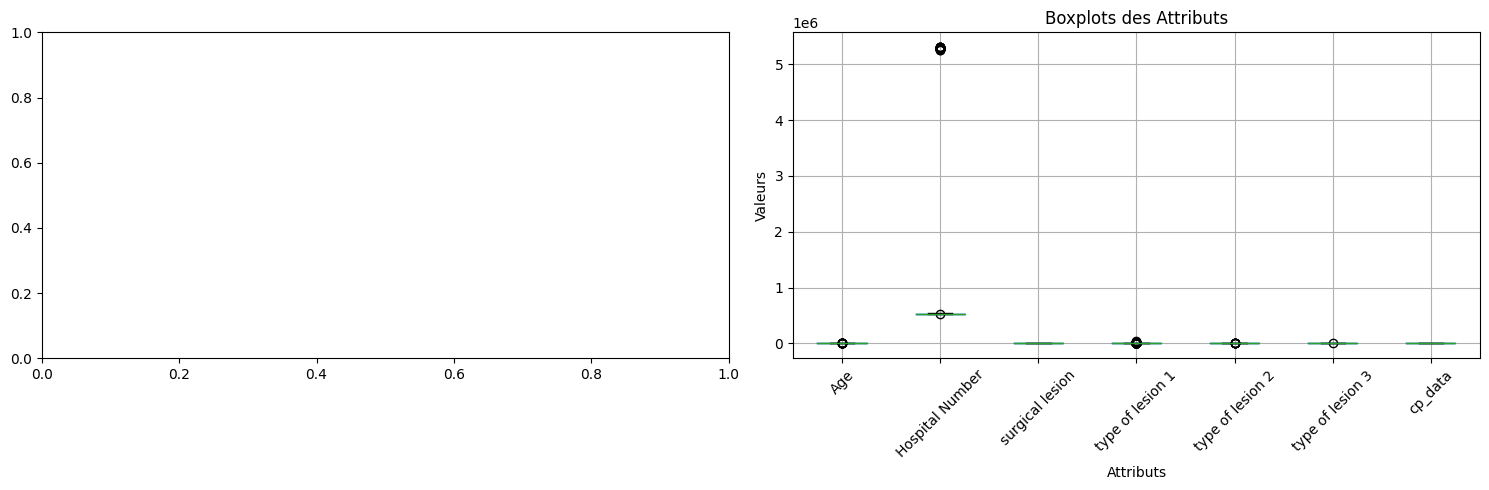

In [61]:
data.boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.title('Boxplots des Attributs')
plt.xlabel('Attributs')
plt.ylabel('Valeurs')
plt.tight_layout()
plt.show()

# TP 2

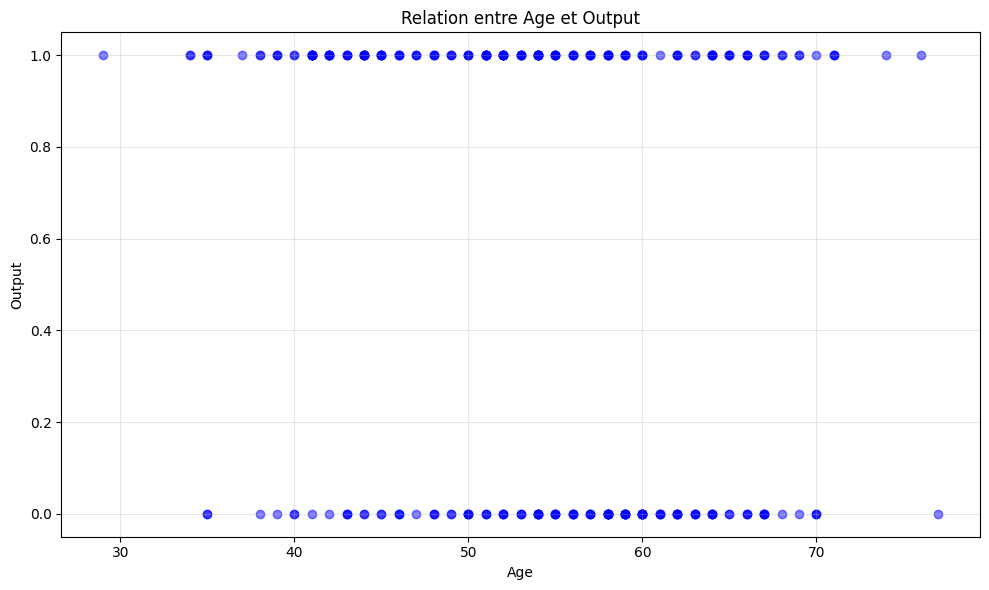

In [62]:
# This cell uses heart.csv data - load it first
heart_data = pd.read_csv('heart.csv')

plt.figure(figsize=(10, 6))
plt.scatter(heart_data['age'], heart_data['output'], color='blue', alpha=0.5)
plt.title('Relation entre Age et Output')
plt.xlabel('Age')
plt.ylabel('Output')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


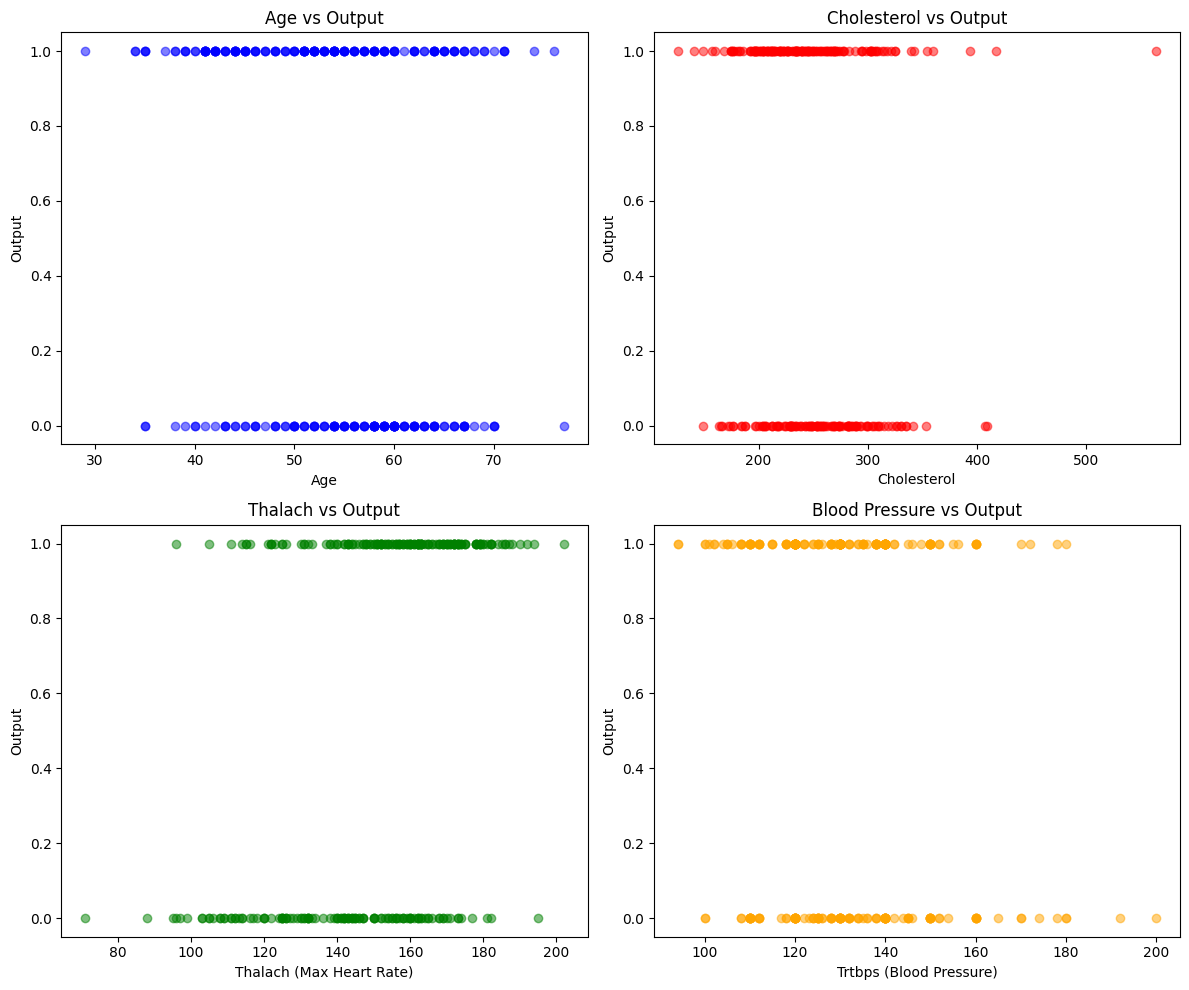

In [63]:
# This cell uses heart.csv data
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].scatter(heart_data['age'], heart_data['output'], color='blue', alpha=0.5)
axes[0, 0].set_title('Age vs Output')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Output')

axes[0, 1].scatter(heart_data['chol'], heart_data['output'], color='red', alpha=0.5)
axes[0, 1].set_title('Cholesterol vs Output')
axes[0, 1].set_xlabel('Cholesterol')
axes[0, 1].set_ylabel('Output')

axes[1, 0].scatter(heart_data['thalachh'], heart_data['output'], color='green', alpha=0.5)
axes[1, 0].set_title('Thalach vs Output')
axes[1, 0].set_xlabel('Thalach (Max Heart Rate)')
axes[1, 0].set_ylabel('Output')

axes[1, 1].scatter(heart_data['trtbps'], heart_data['output'], color='orange', alpha=0.5)
axes[1, 1].set_title('Blood Pressure vs Output')
axes[1, 1].set_xlabel('Trtbps (Blood Pressure)')
axes[1, 1].set_ylabel('Output')

plt.tight_layout()
plt.show()


In [64]:
print("Mode, Moyenne et Médiane pour chaque attribut:")
print("="*80)

for col in data.columns:
    mode = data[col].mode()[0] if not data[col].mode().empty else "N/A"
    
    # Try to convert to numeric and calculate mean/median
    try:
        numeric_col = pd.to_numeric(data[col], errors='coerce')
        mean = numeric_col.mean()
        median_val = numeric_col.median()
    except:
        mean = "N/A"
        median_val = "N/A"
    
    print(f"\nAttribut: {col}")
    print(f"  Mode: {mode}")
    if mean != "N/A":
        print(f"  Moyenne: {mean:.4f}")
    else:
        print(f"  Moyenne: {mean}")
    print(f"  Médiane: {median_val}")
    print("-"*60)

Mode, Moyenne et Médiane pour chaque attribut:

Attribut: surgery
  Mode: 1
  Moyenne: 1.3980
  Médiane: 1.0
------------------------------------------------------------

Attribut: Age
  Mode: 1
  Moyenne: 1.6400
  Médiane: 1.0
------------------------------------------------------------

Attribut: Hospital Number
  Mode: 527544
  Moyenne: 1085888.8333
  Médiane: 530305.5
------------------------------------------------------------

Attribut: rectal temperature
  Mode: ?
  Moyenne: 38.1679
  Médiane: 38.2
------------------------------------------------------------

Attribut: pulse
  Mode: 48
  Moyenne: 71.9130
  Médiane: 64.0
------------------------------------------------------------

Attribut: respiratory rate
  Mode: ?
  Moyenne: 30.4174
  Médiane: 24.5
------------------------------------------------------------

Attribut: temperature of extremities
  Mode: 3
  Moyenne: 2.3484
  Médiane: 3.0
------------------------------------------------------------

Attribut: peripheral pulse


In [65]:
example_data = np.array([1, 2, 3, 4, 5])

min_max_normalized = (example_data - example_data.min()) / (example_data.max() - example_data.min())

print("Normalisation par MIN/MAX:")
print(f"Données originales: {example_data}")
print(f"Données normalisées: {min_max_normalized}")
print(f"\nMin normalisé: {min_max_normalized.min()}")
print(f"Max normalisé: {min_max_normalized.max()}")

Normalisation par MIN/MAX:
Données originales: [1 2 3 4 5]
Données normalisées: [0.   0.25 0.5  0.75 1.  ]

Min normalisé: 0.0
Max normalisé: 1.0


In [66]:
z_score_normalized = (example_data - example_data.mean()) / example_data.std()

print("Normalisation par Z-score:")
print(f"Données originales: {example_data}")
print(f"Données normalisées: {z_score_normalized}")
print(f"\nMoyenne normalisée: {z_score_normalized.mean():.10f}")
print(f"Écart-type normalisé: {z_score_normalized.std():.10f}")

Normalisation par Z-score:
Données originales: [1 2 3 4 5]
Données normalisées: [-1.41421356 -0.70710678  0.          0.70710678  1.41421356]

Moyenne normalisée: 0.0000000000
Écart-type normalisé: 1.0000000000


In [67]:
numeric_cols = ['Age', 'pulse', 'respiratory rate', 'packed cell volume']
# Convert to numeric, replacing '?' with NaN
data_subset = data[numeric_cols].copy()
for col in numeric_cols:
    data_subset[col] = pd.to_numeric(data_subset[col], errors='coerce')

# Drop rows with NaN values for this example
data_subset = data_subset.dropna()

minmax_scaler = MinMaxScaler()
data_minmax = minmax_scaler.fit_transform(data_subset)

standard_scaler = StandardScaler()
data_standard = standard_scaler.fit_transform(data_subset)

print("Normalisation avec Scikit-learn:")
print(f"\nNombre de lignes après nettoyage: {len(data_subset)}")
print("\nDonnées originales (5 premières lignes):")
print(data_subset.head())
print("\nDonnées normalisées MIN/MAX (5 premières lignes):")
print(pd.DataFrame(data_minmax, columns=data_subset.columns).head())
print("\nDonnées normalisées Z-score (5 premières lignes):")
print(pd.DataFrame(data_standard, columns=data_subset.columns).head())

Normalisation avec Scikit-learn:

Nombre de lignes après nettoyage: 219

Données originales (5 premières lignes):
   Age  pulse  respiratory rate  packed cell volume
0    1   66.0              28.0                45.0
1    1   88.0              20.0                50.0
2    1   40.0              24.0                33.0
3    9  164.0              84.0                48.0
4    1  104.0              35.0                74.0

Données normalisées MIN/MAX (5 premières lignes):
   Age     pulse  respiratory rate  packed cell volume
0  0.0  0.233766          0.227273            0.423077
1  0.0  0.376623          0.136364            0.519231
2  0.0  0.064935          0.181818            0.192308
3  1.0  0.870130          0.863636            0.480769
4  0.0  0.480519          0.306818            0.980769

Données normalisées Z-score (5 premières lignes):
        Age     pulse  respiratory rate  packed cell volume
0 -0.308221 -0.179395         -0.130805           -0.091001
1 -0.308221  0.577457 

In [68]:
def scaler(X):
    if hasattr(X, 'to_numpy'):
        X = X.to_numpy()
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1
    return (X - mean) / std

In [69]:
class KMeans:
    def __init__(self, n_clusters, n_init=10, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None
        self.inertia_ = float('inf')

    def fit(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)

        best_inertia = float('inf')

        for _ in range(self.n_init):
            
            initial_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
            centroids = X[initial_indices]
            
            
            for _ in range(self.max_iter):
                distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
                labels = np.argmin(distances, axis=1)

                new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(self.n_clusters)])
                
                for j in range(self.n_clusters):
                    if np.isnan(new_centroids[j]).any():
                        new_centroids[j] = X[np.random.choice(X.shape[0])]

                if np.allclose(centroids, new_centroids):
                    break
                centroids = new_centroids

            current_inertia = 0
            for j in range(self.n_clusters):
                cluster_points = X[labels == j]
                if len(cluster_points) > 0:
                    current_inertia += np.sum((cluster_points - centroids[j])**2)

            if current_inertia < best_inertia:
                best_inertia = current_inertia
                self.centroids = centroids
                self.labels_ = labels
        
        self.inertia_ = best_inertia
        return self


In [70]:
def silhouette_score(X, labels):
    n_samples = X.shape[0]
    unique_labels = np.unique(labels)
    if len(unique_labels) <= 1:
        return 0
        
    silhouette_samples = np.zeros(n_samples)
    
    for i in range(n_samples):
        current_label = labels[i]
        
        mask_a = (labels == current_label) & (np.arange(n_samples) != i)
        if np.any(mask_a):
            a_i = np.mean(np.linalg.norm(X[i] - X[mask_a], axis=1))
        else:
            a_i = 0

        b_i = np.inf
        for label in unique_labels:
            if label == current_label:
                continue
            mask_b = (labels == label)
            mean_dist_b = np.mean(np.linalg.norm(X[i] - X[mask_b], axis=1))
            if mean_dist_b < b_i:
                b_i = mean_dist_b
        
        max_val = a_i if a_i > b_i else b_i
        if max_val == 0:
             silhouette_samples[i] = 0
        else:
             silhouette_samples[i] = (b_i - a_i) / max_val
            
    return np.mean(silhouette_samples)

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('heart.csv')

X = data.drop('output', axis=1)
X_scaled = scaler(X) 

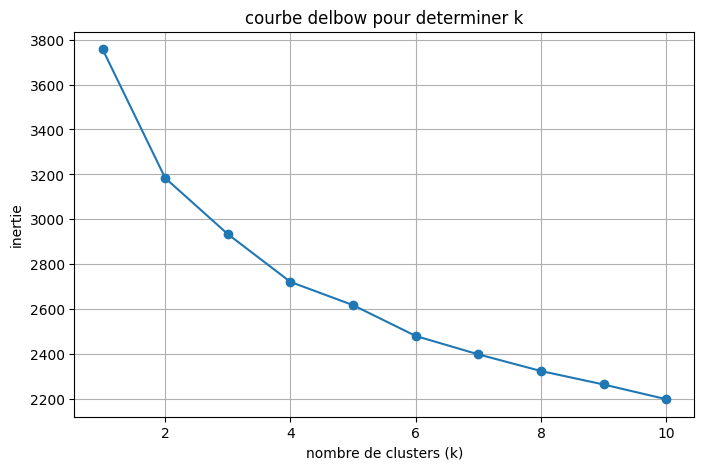

In [72]:
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('nombre de clusters (k)')
plt.ylabel('inertie')
plt.title("courbe delbow pour determiner k")
plt.grid(True)
plt.show()

In [73]:
k_optimal = 2
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

data['cluster'] = clusters

silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"\npour k={k_optimal}, le coefficient de silhouette est : {silhouette_avg:.2f}")

xtab = pd.crosstab(data['output'], data['cluster'])
print("\ntableau croise entre les clusters et la variable 'output':")
print(xtab)


pour k=2, le coefficient de silhouette est : 0.17

tableau croise entre les clusters et la variable 'output':
cluster    0   1
output          
0         40  84
1        152  13


# TP 3

In [74]:
class KMedoid:
    def __init__(self, n_clusters, n_init=10, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.random_state = random_state
        self.medoids = None
        self.labels_ = None
        self.inertia_ = float('inf')

    def fit(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)

        best_inertia = float('inf')

        for _ in range(self.n_init):
            # Initialize medoids randomly
            initial_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
            medoids = X[initial_indices]
            
            labels = None
            for iteration in range(self.max_iter):
                # Assign each point to the nearest medoid
                distances = np.array([[np.linalg.norm(x - medoid) for medoid in medoids] for x in X])
                new_labels = np.argmin(distances, axis=1)

                # Check for convergence
                if labels is not None and np.array_equal(labels, new_labels):
                    break
                labels = new_labels

                # Update medoids: for each cluster, find the point that minimizes sum of distances
                new_medoids = np.zeros_like(medoids)
                for j in range(self.n_clusters):
                    cluster_points = X[labels == j]
                    if len(cluster_points) == 0:
                        # If cluster is empty, keep the old medoid or choose a random point
                        new_medoids[j] = medoids[j]
                    else:
                        # Calculate sum of distances from each point to all other points in cluster
                        min_sum_dist = float('inf')
                        best_medoid_idx = 0
                        for idx, point in enumerate(cluster_points):
                            # Sum of distances from this point to all other points in cluster
                            sum_dist = np.sum([np.linalg.norm(point - other) for other in cluster_points])
                            if sum_dist < min_sum_dist:
                                min_sum_dist = sum_dist
                                best_medoid_idx = idx
                        new_medoids[j] = cluster_points[best_medoid_idx]
                
                medoids = new_medoids

            # Calculate inertia (sum of distances from points to their medoids)
            current_inertia = 0
            for j in range(self.n_clusters):
                cluster_points = X[labels == j]
                if len(cluster_points) > 0:
                    current_inertia += np.sum([np.linalg.norm(point - medoids[j])**2 for point in cluster_points])

            if current_inertia < best_inertia:
                best_inertia = current_inertia
                self.medoids = medoids
                self.labels_ = labels
        
        self.inertia_ = best_inertia
        return self


In [ ]:
# Application de KMedoid sur les mêmes données
k_optimal = 2
kmedoid = KMedoid(n_clusters=k_optimal, random_state=42, n_init=10)
kmedoid.fit(X_scaled)
clusters_medoid = kmedoid.labels_

# Application de KMeans pour comparaison
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
kmeans.fit(X_scaled)
clusters_kmeans = kmeans.labels_

# Calcul des métriques pour KMedoid
silhouette_medoid = silhouette_score(X_scaled, clusters_medoid)
inertia_medoid = kmedoid.inertia_

# Calcul des métriques pour KMeans
silhouette_kmeans = silhouette_score(X_scaled, clusters_kmeans)
inertia_kmeans = kmeans.inertia_

print("="*80)
print("COMPARAISON ENTRE KMEANS ET KMEDOID")
print("="*80)
print(f"\nKMeans:")
print(f"  - Coefficient de silhouette: {silhouette_kmeans:.4f}")
print(f"  - Inertie: {inertia_kmeans:.4f}")
print(f"\nKMedoid:")
print(f"  - Coefficient de silhouette: {silhouette_medoid:.4f}")
print(f"  - Inertie: {inertia_medoid:.4f}")
print("\n" + "="*80)


In [ ]:
# Tableaux croisés pour comparer les résultats
data_compare = pd.DataFrame({
    'output': data['output'],
    'kmeans': clusters_kmeans,
    'kmedoid': clusters_medoid
})

print("Tableau croisé KMeans vs Output:")
print(pd.crosstab(data_compare['output'], data_compare['kmeans']))
print("\nTableau croisé KMedoid vs Output:")
print(pd.crosstab(data_compare['output'], data_compare['kmedoid']))


Tableau croisé KMeans vs Output:
kmeans    0   1
output         
0        40  84
1       152  13

Tableau croisé KMedoid vs Output:
kmedoid    0   1
output          
0         45  79
1        152  13


In [ ]:
# Visualisation comparative
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Graphique 1: Comparaison des métriques
metrics = ['Silhouette', 'Inertie\n(normalisée)']
max_inertia = max([inertia_kmeans, inertia_medoid])  # Utiliser max() avec une liste pour éviter le conflit avec la fonction custom
kmeans_values = [silhouette_kmeans, inertia_kmeans / max_inertia]
kmedoid_values = [silhouette_medoid, inertia_medoid / max_inertia]

x = np.arange(len(metrics))
width = 0.35

axes[0].bar(x - width/2, kmeans_values, width, label='KMeans', alpha=0.8)
axes[0].bar(x + width/2, kmedoid_values, width, label='KMedoid', alpha=0.8)
axes[0].set_ylabel('Valeur')
axes[0].set_title('Comparaison des Métriques')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Graphique 2: Visualisation 2D (en utilisant les 2 premières composantes)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

scatter = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, cmap='viridis', alpha=0.6, s=50)
axes[1].set_title('Clusters KMeans (vue PCA 2D)')
axes[1].set_xlabel('Première composante principale')
axes[1].set_ylabel('Deuxième composante principale')
plt.colorbar(scatter, ax=axes[1])

plt.tight_layout()
plt.show()

# Visualisation KMedoid
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, cmap='viridis', alpha=0.6, s=50)
axes[0].set_title('Clusters KMeans')
axes[0].set_xlabel('Première composante principale')
axes[0].set_ylabel('Deuxième composante principale')
plt.colorbar(scatter1, ax=axes[0])

scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_medoid, cmap='viridis', alpha=0.6, s=50)
axes[1].set_title('Clusters KMedoid')
axes[1].set_xlabel('Première composante principale')
axes[1].set_ylabel('Deuxième composante principale')
plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.show()


TypeError: max() takes 1 positional argument but 2 were given

In [ ]:
# Comparaison des courbes d'elbow pour KMeans et KMedoid
inertias_kmeans = []
inertias_kmedoid = []
k_range = range(2, 8)

for k in k_range:
    # KMeans
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled)
    inertias_kmeans.append(kmeans_temp.inertia_)
    
    # KMedoid
    kmedoid_temp = KMedoid(n_clusters=k, random_state=42, n_init=10)
    kmedoid_temp.fit(X_scaled)
    inertias_kmedoid.append(kmedoid_temp.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias_kmeans, marker='o', label='KMeans', linewidth=2)
plt.plot(k_range, inertias_kmedoid, marker='s', label='KMedoid', linewidth=2)
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Comparaison des courbes d\'elbow: KMeans vs KMedoid')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Résumé de la comparaison KMeans vs KMedoid

### Différences principales:

1. **Centres des clusters:**
   - **KMeans**: Utilise des centroïdes (moyennes des points du cluster) qui peuvent ne pas être des points réels des données
   - **KMedoid**: Utilise des médoides (points réels des données) qui minimisent la somme des distances

2. **Robustesse aux outliers:**
   - **KMeans**: Sensible aux valeurs aberrantes car les centroïdes sont influencés par tous les points
   - **KMedoid**: Plus robuste aux outliers car les médoides sont des points réels

3. **Complexité:**
   - **KMeans**: Généralement plus rapide (O(n*k*d*iterations))
   - **KMedoid**: Plus lent car il doit calculer toutes les distances entre points dans chaque cluster

4. **Types de données:**
   - **KMeans**: Fonctionne bien avec des données numériques et la distance euclidienne
   - **KMedoid**: Peut fonctionner avec n'importe quelle mesure de distance (pas seulement euclidienne)
